# Benchmarking organizations with the Dimensions API

This Python notebook shows how to use the [Dimensions Analytics API](https://www.dimensions.ai/dimensions-apis/) in order to perform different benchmarking analyses of Organizations using publications data. 

Outline

1. Quick yet effective benchmarking calculations via built-in API aggregate indicators
2. Building more complex quality benchmarking indicators 

In [2]:
import datetime
print("==\nCHANGELOG\nThis notebook was last run on %s\n==" % datetime.date.today().strftime('%b %d, %Y'))

==
CHANGELOG
This notebook was last run on Feb 21, 2022
==


## Prerequisites

This notebook assumes you have installed the [Dimcli](https://pypi.org/project/dimcli/) library and are familiar with the ['Getting Started' tutorial](https://api-lab.dimensions.ai/cookbooks/1-getting-started/1-Using-the-Dimcli-library-to-query-the-API.html).


In [3]:
!pip install dimcli -U --quiet 

import dimcli
from dimcli.utils import *
import os, sys, time, json
import pandas as pd

print("==\nLogging in..")
# https://digital-science.github.io/dimcli/getting-started.html#authentication
ENDPOINT = "https://app.dimensions.ai"
if 'google.colab' in sys.modules:
  import getpass
  KEY = getpass.getpass(prompt='API Key: ')  
  dimcli.login(key=KEY, endpoint=ENDPOINT)
else:
  KEY = ""
  dimcli.login(key=KEY, endpoint=ENDPOINT)
dsl = dimcli.Dsl()

Searching config file credentials for 'https://app.dimensions.ai' endpoint..


==
Logging in..
Dimcli - Dimensions API Client (v0.9.6)
Connected to: <https://app.dimensions.ai/api/dsl> - DSL v2.0
Method: dsl.ini file


## 1. Quick benchmarking using the API

Benchmarking by volume is reasonably straight forward if what you want to compare is volume, or one of the available aggregate indicators in the Dimensions API (see [https://docs.dimensions.ai/dsl/examples.html#indicators-aggregations](https://docs.dimensions.ai/dsl/examples.html#indicators-aggregations)).

In [4]:
%%dsldf
search publications
return research_orgs[name] aggregate altmetric_median 

Returned Research_orgs: 20
Time: 21.14s


altmetric_median   count             id  \
0                5.0  546592  grid.38142.3c   
1                3.0  484017  grid.26999.3d   
2                4.0  342764  grid.17063.33   
3                3.0  320966  grid.214458.e   
4                3.0  310485  grid.258799.8   
5                4.0  302094  grid.168010.e   
6                4.0  297558  grid.34477.33   
7                3.0  297094  grid.19006.3e   
8                5.0  289280    grid.4991.5   
9                4.0  285143  grid.21107.35   
10               4.0  282170    grid.5335.0   
11               2.0  280405  grid.11899.38   
12               4.0  271170  grid.25879.31   
13               4.0  266337  grid.83440.3b   
14               3.0  265592  grid.136593.b   
15               3.0  250749  grid.69566.3a   
16               3.0  244713    grid.5386.8   
17               4.0  242749  grid.47840.3f   
18               3.0  239283  grid.17635.36   
19               4.0  236142  grid.21729.3f   

                                     name  
0                      Harvard University  
1                     University of Tokyo  
2                   University of Toronto  
3                  University of Michigan  
4                        Kyoto University  
5                     Stanford University  
6                University of Washington  
7   University of California, Los Angeles  
8                    University of Oxford  
9                Johns Hopkins University  
10                University of Cambridge  
11                University of São Paulo  
12             University of Pennsylvania  
13              University College London  
14                       Osaka University  
15                      Tohoku University  
16                     Cornell University  
17     University of California, Berkeley  
18                University of Minnesota  
19                    Columbia University

In [5]:
%%dsldf
search publications
return research_orgs[name] aggregate citations_total

Returned Research_orgs: 20
Time: 6.63s


citations_total   count             id  \
0        28836616.0  546592  grid.38142.3c   
1         8545148.0  484017  grid.26999.3d   
2        11040840.0  342764  grid.17063.33   
3        11710248.0  320966  grid.214458.e   
4         5928948.0  310485  grid.258799.8   
5        14738599.0  302094  grid.168010.e   
6        12585381.0  297558  grid.34477.33   
7        11710928.0  297094  grid.19006.3e   
8        10879614.0  289280    grid.4991.5   
9        12084053.0  285143  grid.21107.35   
10       10814051.0  282170    grid.5335.0   
11        4105653.0  280405  grid.11899.38   
12       10450691.0  271170  grid.25879.31   
13        9614297.0  266337  grid.83440.3b   
14        4653874.0  265592  grid.136593.b   
15        3694359.0  250749  grid.69566.3a   
16        9370701.0  244713    grid.5386.8   
17       11806056.0  242749  grid.47840.3f   
18        8360048.0  239283  grid.17635.36   
19        9400497.0  236142  grid.21729.3f   

                                     name  
0                      Harvard University  
1                     University of Tokyo  
2                   University of Toronto  
3                  University of Michigan  
4                        Kyoto University  
5                     Stanford University  
6                University of Washington  
7   University of California, Los Angeles  
8                    University of Oxford  
9                Johns Hopkins University  
10                University of Cambridge  
11                University of São Paulo  
12             University of Pennsylvania  
13              University College London  
14                       Osaka University  
15                      Tohoku University  
16                     Cornell University  
17     University of California, Berkeley  
18                University of Minnesota  
19                    Columbia University

In [6]:
%%dsldf
search publications
return research_orgs[name] aggregate recent_citations_total

Returned Research_orgs: 20
Time: 6.54s


count             id                                   name  \
0   546592  grid.38142.3c                     Harvard University   
1   484017  grid.26999.3d                    University of Tokyo   
2   342764  grid.17063.33                  University of Toronto   
3   320966  grid.214458.e                 University of Michigan   
4   310485  grid.258799.8                       Kyoto University   
5   302094  grid.168010.e                    Stanford University   
6   297558  grid.34477.33               University of Washington   
7   297094  grid.19006.3e  University of California, Los Angeles   
8   289280    grid.4991.5                   University of Oxford   
9   285143  grid.21107.35               Johns Hopkins University   
10  282170    grid.5335.0                University of Cambridge   
11  280405  grid.11899.38                University of São Paulo   
12  271170  grid.25879.31             University of Pennsylvania   
13  266337  grid.83440.3b              University College London   
14  265592  grid.136593.b                       Osaka University   
15  250749  grid.69566.3a                      Tohoku University   
16  244713    grid.5386.8                     Cornell University   
17  242749  grid.47840.3f     University of California, Berkeley   
18  239283  grid.17635.36                University of Minnesota   
19  236142  grid.21729.3f                    Columbia University   

    recent_citations_total  
0                5562378.0  
1                1471000.0  
2                2380994.0  
3                2370219.0  
4                1006685.0  
5                2985116.0  
6                2411827.0  
7                2137101.0  
8                2504619.0  
9                2352686.0  
10               2110364.0  
11               1124894.0  
12               2049126.0  
13               2197569.0  
14                727151.0  
15                644246.0  
16               1809884.0  
17               2057506.0  
18               1519539.0  
19               1754780.0

Aside:  Recent Citations


In [7]:
%%dsldf
search publications
return year aggregate recent_citations_total

Returned Year: 20
Time: 4.06s


count    id  recent_citations_total
0   6503486  2020              18375337.0
1   6391947  2021               4632716.0
2   5792555  2019              22470145.0
3   5369555  2018              23030935.0
4   5044596  2017              21362603.0
5   4598245  2016              19046830.0
6   4395107  2015              17010283.0
7   4244049  2014              15057104.0
8   4046162  2013              13475978.0
9   3762532  2012              11970228.0
10  3667073  2011              10958039.0
11  3430544  2010               9915351.0
12  3144460  2009               8991871.0
13  2937393  2008               7853718.0
14  2915691  2007               7198101.0
15  2610760  2006               6579372.0
16  2410569  2005               5985630.0
17  2246194  2004               5335870.0
18  2037978  2003               4730168.0
19  1892417  2002               4234096.0

<AxesSubplot:xlabel='id'>

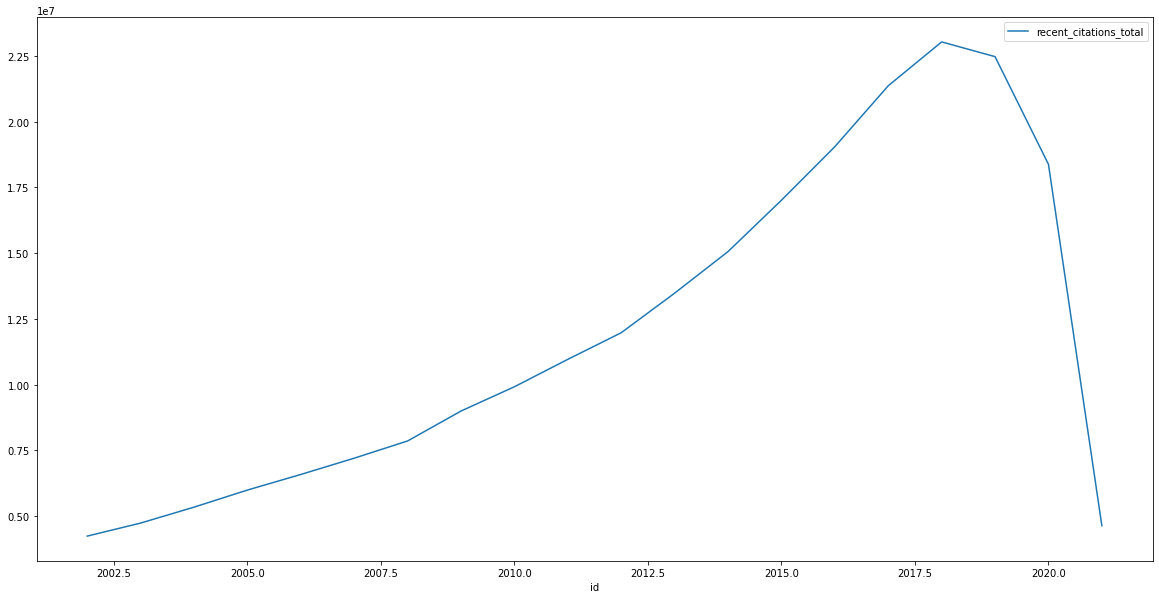

In [8]:
dsl_last_results.sort_values(by='id').plot(x='id', y='recent_citations_total', figsize=(20,10))

In [9]:
recent_citations = dsl_last_results

In [10]:
recent_citations['recent_ratio'] = recent_citations['recent_citations_total']/recent_citations['count']
recent_citations['year'] = recent_citations['id']

<AxesSubplot:xlabel='year'>

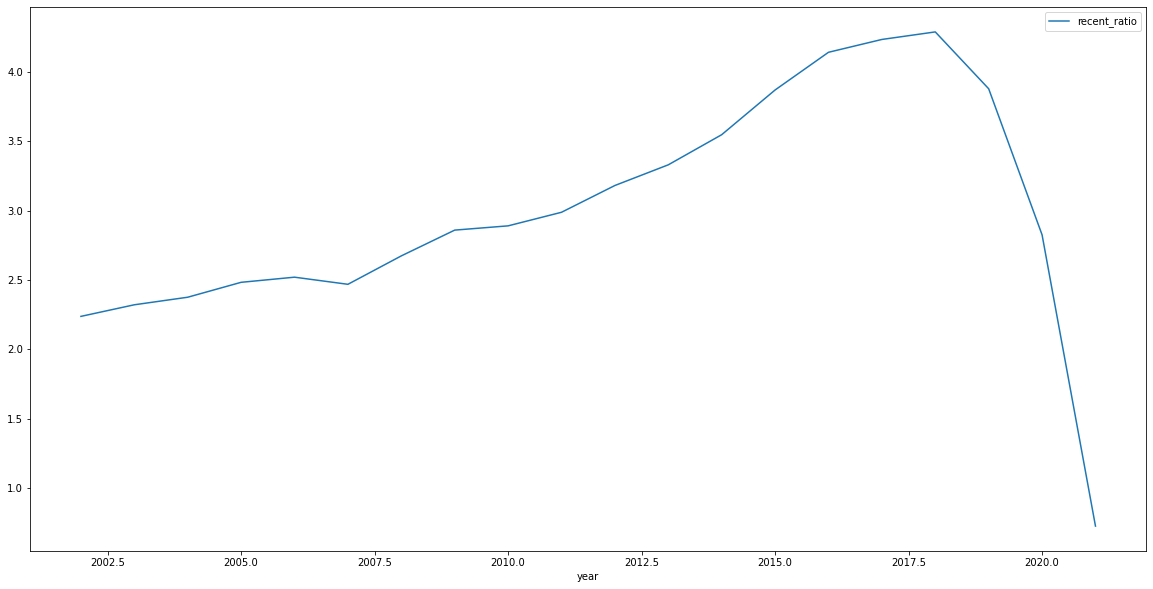

In [11]:
recent_citations.sort_values(by='year').\
    plot(x='year',y='recent_ratio', figsize=(20,10))

End Aside:

## 2. Calculating more complex 'Quality' Benchmarking indicators: Number of articles in the top X percent of research their category

### Step 1.  retrieve the total volume of publications by volume. (focusing on Fields of Research)

In [12]:
%%dsldf

search publications
where year=2018
return category_for limit 1000

Returned Category_for: 176
Time: 1.02s


count    id                                             name
0    1168442  2211                   11 Medical and Health Sciences
1     610238  2209                                   09 Engineering
2     447354  3053                           1103 Clinical Sciences
3     335403  2206                           06 Biological Sciences
4     332128  2208            08 Information and Computing Sciences
..       ...   ...                                              ...
171      187  3528                 1899 Other Law and Legal Studies
172      144  3491     1799 Other Psychology and Cognitive Sciences
173       72  3567  1999 Other Studies In Creative Arts and Writing
174       62  3240          1299 Other Built Environment and Design
175       21  3223                          1204 Engineering Design

[176 rows x 3 columns]

#### Step 1.2. ... Need to filter for level 2 codes

In [13]:
result = dsl.query("""
      search publications
      where year=2018
      return category_for limit 1000

""").as_dataframe()

Returned Category_for: 176
Time: 0.84s


In [14]:
result['level'] = result.name.apply(lambda n: len(n.split(' ')[0]))

In [15]:
result

count    id                                             name  level
0    1168442  2211                   11 Medical and Health Sciences      2
1     610238  2209                                   09 Engineering      2
2     447354  3053                           1103 Clinical Sciences      4
3     335403  2206                           06 Biological Sciences      2
4     332128  2208            08 Information and Computing Sciences      2
..       ...   ...                                              ...    ...
171      187  3528                 1899 Other Law and Legal Studies      4
172      144  3491     1799 Other Psychology and Cognitive Sciences      4
173       72  3567  1999 Other Studies In Creative Arts and Writing      4
174       62  3240          1299 Other Built Environment and Design      4
175       21  3223                          1204 Engineering Design      4

[176 rows x 4 columns]

In [16]:
result[result['level']==2]

count    id                                           name  level
0   1168442  2211                 11 Medical and Health Sciences      2
1    610238  2209                                 09 Engineering      2
3    335403  2206                         06 Biological Sciences      2
4    332128  2208          08 Information and Computing Sciences      2
5    304680  2203                           03 Chemical Sciences      2
7    224973  2202                           02 Physical Sciences      2
8    201573  2201                       01 Mathematical Sciences      2
12   161476  2217           17 Psychology and Cognitive Sciences      2
13   151455  2216                    16 Studies in Human Society      2
18    98630  2215  15 Commerce, Management, Tourism and Services      2
20    95061  2210                                  10 Technology      2
21    94318  2220         20 Language, Communication and Culture      2
24    88929  2213                                   13 Education      2
25    86868  2204                              04 Earth Sciences      2
26    85471  2214                                   14 Economics      2
27    80461  2221                     21 History and Archaeology      2
32    71522  2205                      05 Environmental Sciences      2
35    67805  2207        07 Agricultural and Veterinary Sciences      2
41    56606  2222            22 Philosophy and Religious Studies      2
48    43353  2218                       18 Law and Legal Studies      2
74    26972  2212                12 Built Environment and Design      2
84    20301  2219        19 Studies in Creative Arts and Writing      2

### Step 2. calculate 1% of the total number of records by category. This will be used to retrieve the 1% boundary record..

What is the boundary record? 

In [17]:
result['cutoff'] = (result['count'] * .01).astype('int')

In [18]:
result[result['level']==2]

count    id                                           name  level  \
0   1168442  2211                 11 Medical and Health Sciences      2   
1    610238  2209                                 09 Engineering      2   
3    335403  2206                         06 Biological Sciences      2   
4    332128  2208          08 Information and Computing Sciences      2   
5    304680  2203                           03 Chemical Sciences      2   
7    224973  2202                           02 Physical Sciences      2   
8    201573  2201                       01 Mathematical Sciences      2   
12   161476  2217           17 Psychology and Cognitive Sciences      2   
13   151455  2216                    16 Studies in Human Society      2   
18    98630  2215  15 Commerce, Management, Tourism and Services      2   
20    95061  2210                                  10 Technology      2   
21    94318  2220         20 Language, Communication and Culture      2   
24    88929  2213                                   13 Education      2   
25    86868  2204                              04 Earth Sciences      2   
26    85471  2214                                   14 Economics      2   
27    80461  2221                     21 History and Archaeology      2   
32    71522  2205                      05 Environmental Sciences      2   
35    67805  2207        07 Agricultural and Veterinary Sciences      2   
41    56606  2222            22 Philosophy and Religious Studies      2   
48    43353  2218                       18 Law and Legal Studies      2   
74    26972  2212                12 Built Environment and Design      2   
84    20301  2219        19 Studies in Creative Arts and Writing      2   

    cutoff  
0    11684  
1     6102  
3     3354  
4     3321  
5     3046  
7     2249  
8     2015  
12    1614  
13    1514  
18     986  
20     950  
21     943  
24     889  
25     868  
26     854  
27     804  
32     715  
35     678  
41     566  
48     433  
74     269  
84     203

### Step 3. Use the cutoff value to get the indicator value for the 1% boundary

Note: Here we use:

'sort by' , limit, and skip!

*   'sort by': return results in order of field_citation_ratio
*   'limit': we are only interested in the first result returned
*   'skip' we are 'skipping' to the boundary record


Double Note: this strategy won't work when the boundary record is > 50,000...




In [19]:
dfl = []

for r in result[result['level']==2].iterrows():
    
    result = dsl.query(f"""
      
           search publications
           where category_for.id = "{r[1]['id']}"
           and year = 2018
           return publications[field_citation_ratio] 
               sort by field_citation_ratio 
               limit 1 
               skip {r[1]['cutoff']}
      
      """).as_dataframe()

    result['name'] = r[1]['name']
    result['id'] = r[1]['id']
    dfl.append(result)   
  

Returned Publications: 1 (total = 1168442)
Time: 9.13s
Returned Publications: 1 (total = 610238)
Time: 4.71s
Returned Publications: 1 (total = 335403)
Time: 2.55s
Returned Publications: 1 (total = 332128)
Time: 2.55s
Returned Publications: 1 (total = 304680)
Time: 2.17s
Returned Publications: 1 (total = 224973)
Time: 2.28s
Returned Publications: 1 (total = 201573)
Time: 2.07s
Returned Publications: 1 (total = 161476)
Time: 1.58s
Returned Publications: 1 (total = 151455)
Time: 1.67s
Returned Publications: 1 (total = 98630)
Time: 1.27s
Returned Publications: 1 (total = 95061)
Time: 0.91s
Returned Publications: 1 (total = 94318)
Time: 1.18s
Returned Publications: 1 (total = 88929)
Time: 1.07s
Returned Publications: 1 (total = 86868)
Time: 1.03s
Returned Publications: 1 (total = 85471)
Time: 1.12s
Returned Publications: 1 (total = 80461)
Time: 1.27s
Returned Publications: 1 (total = 71522)
Time: 0.92s
Returned Publications: 1 (total = 67805)
Time: 1.14s
Returned Publications: 1 (total = 56

In [20]:
cutoffs = pd.concat(dfl)

In [21]:
cutoffs

field_citation_ratio                                           name    id
0                 28.41                 11 Medical and Health Sciences  2211
0                 21.35                                 09 Engineering  2209
0                 20.52                         06 Biological Sciences  2206
0                 35.44          08 Information and Computing Sciences  2208
0                 20.51                           03 Chemical Sciences  2203
0                 24.72                           02 Physical Sciences  2202
0                 27.12                       01 Mathematical Sciences  2201
0                 24.56           17 Psychology and Cognitive Sciences  2217
0                 27.91                    16 Studies in Human Society  2216
0                 32.01  15 Commerce, Management, Tourism and Services  2215
0                 25.02                                  10 Technology  2210
0                 30.45         20 Language, Communication and Culture  2220
0                 25.34                                   13 Education  2213
0                 16.52                              04 Earth Sciences  2204
0                 33.18                                   14 Economics  2214
0                 28.80                     21 History and Archaeology  2221
0                 20.46                      05 Environmental Sciences  2205
0                 15.42        07 Agricultural and Veterinary Sciences  2207
0                 27.68            22 Philosophy and Religious Studies  2222
0                 27.52                       18 Law and Legal Studies  2218
0                 16.68                12 Built Environment and Design  2212
0                 27.55        19 Studies in Creative Arts and Writing  2219

#### We can only filter on integers in the DSL, so we will round up the values

In [22]:
cutoffs.field_citation_ratio =  cutoffs.field_citation_ratio.astype('int')

In [23]:
cutoffs

field_citation_ratio                                           name    id
0                    28                 11 Medical and Health Sciences  2211
0                    21                                 09 Engineering  2209
0                    20                         06 Biological Sciences  2206
0                    35          08 Information and Computing Sciences  2208
0                    20                           03 Chemical Sciences  2203
0                    24                           02 Physical Sciences  2202
0                    27                       01 Mathematical Sciences  2201
0                    24           17 Psychology and Cognitive Sciences  2217
0                    27                    16 Studies in Human Society  2216
0                    32  15 Commerce, Management, Tourism and Services  2215
0                    25                                  10 Technology  2210
0                    30         20 Language, Communication and Culture  2220
0                    25                                   13 Education  2213
0                    16                              04 Earth Sciences  2204
0                    33                                   14 Economics  2214
0                    28                     21 History and Archaeology  2221
0                    20                      05 Environmental Sciences  2205
0                    15        07 Agricultural and Veterinary Sciences  2207
0                    27            22 Philosophy and Religious Studies  2222
0                    27                       18 Law and Legal Studies  2218
0                    16                12 Built Environment and Design  2212
0                    27        19 Studies in Creative Arts and Writing  2219

### Step 4. Now get the number of publications by organisation, filtered by category that have a field_citation_ratio > the boundary score

In [24]:
dfl = []

for r in cutoffs.iterrows():

  result = dsl.query(f"""

     search publications 
     where 
         year=2018
         and category_for.id = "{r[1]['id']}"
         and field_citation_ratio >= {int(r[1]['field_citation_ratio'])}
    return research_orgs limit 1000

  """).as_dataframe()

  result['for_name'] = r[1]['name']
  result['for_id'] = r[1]['id']
  dfl.append(result)



Returned Research_orgs: 1000
Time: 1.21s
Returned Research_orgs: 1000
Time: 1.09s
Returned Research_orgs: 1000
Time: 3.14s
Returned Research_orgs: 1000
Time: 1.30s
Returned Research_orgs: 1000
Time: 0.96s
Returned Research_orgs: 1000
Time: 1.13s
Returned Research_orgs: 1000
Time: 1.06s
Returned Research_orgs: 1000
Time: 1.16s
Returned Research_orgs: 1000
Time: 1.06s
Returned Research_orgs: 927
Time: 1.13s
Returned Research_orgs: 915
Time: 1.04s
Returned Research_orgs: 704
Time: 0.83s
Returned Research_orgs: 863
Time: 1.03s
Returned Research_orgs: 1000
Time: 1.01s
Returned Research_orgs: 903
Time: 0.96s
Returned Research_orgs: 896
Time: 1.10s
Returned Research_orgs: 1000
Time: 1.26s
Returned Research_orgs: 1000
Time: 1.07s
Returned Research_orgs: 476
Time: 0.81s
Returned Research_orgs: 495
Time: 0.71s
Returned Research_orgs: 369
Time: 0.75s
Returned Research_orgs: 210
Time: 0.77s


ok, can only filter on Integrers

In [25]:
top_insts = pd.concat(dfl)

### Step 5. Rank the results

In [26]:
top_insts['rank'] = top_insts.groupby('for_name')['count'].rank(ascending=False)

In [27]:
top_insts[top_insts['name']=='University of Melbourne'][['for_name','rank']]

for_name   rank
21                  11 Medical and Health Sciences   22.0
103                                 09 Engineering  107.0
25                          06 Biological Sciences   26.0
99           08 Information and Computing Sciences  105.0
161                           03 Chemical Sciences  170.5
142                           02 Physical Sciences  150.0
45                        01 Mathematical Sciences   48.5
9             17 Psychology and Cognitive Sciences   11.5
32                     16 Studies in Human Society   36.0
66   15 Commerce, Management, Tourism and Services   88.0
35          20 Language, Communication and Culture   46.0
17                                    13 Education   22.5
196                              04 Earth Sciences  230.0
83                                    14 Economics  110.0
263                     21 History and Archaeology  579.5
30                       05 Environmental Sciences   34.5
22         07 Agricultural and Veterinary Sciences   26.0
133            22 Philosophy and Religious Studies  304.0
23                        18 Law and Legal Studies   37.0
20                 12 Built Environment and Design   32.5
0          19 Studies in Creative Arts and Writing    1.0

#### We should probably control for Volume though...

### Step 6. Get the total paper counts for each organisation

In [28]:
dfl = []

for r in cutoffs.iterrows():

  result = dsl.query(f"""

     search publications 
     where 
         year=2018
         and category_for.id = "{r[1]['id']}"
    return research_orgs limit 1000

  """).as_dataframe()

  result['for_name'] = r[1]['name']
  result['for_id'] = r[1]['id']
  dfl.append(result)



Returned Research_orgs: 1000
Time: 1.47s
Returned Research_orgs: 1000
Time: 1.12s
Returned Research_orgs: 1000
Time: 1.14s
Returned Research_orgs: 1000
Time: 1.09s
Returned Research_orgs: 1000
Time: 0.97s
Returned Research_orgs: 1000
Time: 1.17s
Returned Research_orgs: 1000
Time: 1.29s
Returned Research_orgs: 1000
Time: 1.11s
Returned Research_orgs: 1000
Time: 1.00s
Returned Research_orgs: 1000
Time: 1.02s
Returned Research_orgs: 1000
Time: 0.98s
Returned Research_orgs: 1000
Time: 0.98s
Returned Research_orgs: 1000
Time: 1.03s
Returned Research_orgs: 1000
Time: 0.98s
Returned Research_orgs: 1000
Time: 0.98s
Returned Research_orgs: 1000
Time: 1.12s
Returned Research_orgs: 1000
Time: 1.14s
Returned Research_orgs: 1000
Time: 1.15s
Returned Research_orgs: 1000
Time: 1.15s
Returned Research_orgs: 1000
Time: 1.10s
Returned Research_orgs: 1000
Time: 0.97s
Returned Research_orgs: 1000
Time: 0.96s


In [29]:
all_publications = pd.concat(dfl)[['id','for_id','count']]

In [30]:
top_insts_all = all_publications.rename(columns={'count':'count all'}).merge(top_insts, on =['id','for_id'])

In [31]:
top_insts_all[['for_name','name','count','count all']]

for_name  \
0               11 Medical and Health Sciences   
1               11 Medical and Health Sciences   
2               11 Medical and Health Sciences   
3               11 Medical and Health Sciences   
4               11 Medical and Health Sciences   
...                                        ...   
12220  19 Studies in Creative Arts and Writing   
12221  19 Studies in Creative Arts and Writing   
12222  19 Studies in Creative Arts and Writing   
12223  19 Studies in Creative Arts and Writing   
12224  19 Studies in Creative Arts and Writing   

                                           name  count  count all  
0                            Harvard University    845      16932  
1                         University of Toronto    392      10281  
2                      Johns Hopkins University    391      10120  
3       University of California, San Francisco    365       7850  
4                                   Mayo Clinic    321       7659  
...                                         ...    ...        ...  
12220                     University of Bamberg      1          3  
12221            National University of Quilmes      1          2  
12222  Czech University of Life Sciences Prague      1          2  
12223         University Hospitals of Cleveland      1          2  
12224                          Grinnell College      1          2  

[12225 rows x 4 columns]

### Step 7.  calculate the percentage of local papers in the top 1% of global publications (in 2018)

In [32]:
top_insts_all['percentage top 1'] = (100 * top_insts_all['count']/top_insts_all['count all']).round(2)

In [33]:
top_insts_all['percent rank'] = top_insts_all.groupby('for_name')['percentage top 1'].rank(ascending=False)

#### Now the results are going to look a little strange... 

In [34]:
top_insts_all[top_insts_all['name']=='University of Cambridge'][['for_name','percent rank']]

for_name  percent rank
66                    11 Medical and Health Sciences          41.0
840                                   09 Engineering         138.0
1498                          06 Biological Sciences         100.0
2294           08 Information and Computing Sciences         475.5
2875                            03 Chemical Sciences          93.5
3512                            02 Physical Sciences         278.5
4277                        01 Mathematical Sciences         117.0
4921            17 Psychology and Cognitive Sciences          52.5
5584                     16 Studies in Human Society         236.5
6165   15 Commerce, Management, Tourism and Services         150.0
6864                                   10 Technology         304.0
7312          20 Language, Communication and Culture         398.5
7785                                    13 Education         377.0
8302                               04 Earth Sciences         346.5
8940                                    14 Economics         310.5
9467                      21 History and Archaeology         305.0
10013                      05 Environmental Sciences         123.0
10741        07 Agricultural and Veterinary Sciences         124.5
11176            22 Philosophy and Religious Studies         311.5
11503                       18 Law and Legal Studies         196.0
11823                12 Built Environment and Design         181.0

In [35]:
top_insts_all[top_insts_all['for_name']=='11 Medical and Health Sciences'][['name','percent rank']]

name  percent rank
0                           Harvard University          61.5
1                        University of Toronto         236.5
2                     Johns Hopkins University         220.0
3      University of California, San Francisco          93.5
4                                  Mayo Clinic         152.0
..                                         ...           ...
780                         University of Bath         425.0
781                 Kuopio University Hospital         250.5
782  Marqués de Valdecilla University Hospital         299.0
783          Policlinico San Matteo Fondazione         114.5
784   Centre Hospitalier Universitaire de Caen         351.5

[785 rows x 2 columns]

Smaller institutions are being preferenced too much...

#### Need to control for size...

In [36]:
reference_institutions = top_insts_all[['id','name','for_id','count all']].\
     rename(columns={
            'id':'reference id',
            'name':'reference name',
           'count all':'reference count all'
           })

In [37]:
relative_ranking = reference_institutions.merge(top_insts_all, on='for_id')

In [38]:
relative_ranking[relative_ranking['reference name']=='University of Melbourne']

reference id           reference name for_id  reference count all  \
15700    grid.1008.9  University of Melbourne   2211                 5457   
15701    grid.1008.9  University of Melbourne   2211                 5457   
15702    grid.1008.9  University of Melbourne   2211                 5457   
15703    grid.1008.9  University of Melbourne   2211                 5457   
15704    grid.1008.9  University of Melbourne   2211                 5457   
...              ...                      ...    ...                  ...   
7350128  grid.1008.9  University of Melbourne   2219                   85   
7350129  grid.1008.9  University of Melbourne   2219                   85   
7350130  grid.1008.9  University of Melbourne   2219                   85   
7350131  grid.1008.9  University of Melbourne   2219                   85   
7350132  grid.1008.9  University of Melbourne   2219                   85   

                    id  count all      city_name  count   country_name  \
15700    grid.38142.3c      16932      Cambridge    845  United States   
15701    grid.17063.33      10281        Toronto    392         Canada   
15702    grid.21107.35      10120      Baltimore    391  United States   
15703    grid.266102.1       7850  San Francisco    365  United States   
15704    grid.66875.3a       7659      Rochester    321  United States   
...                ...        ...            ...    ...            ...   
7350128    grid.7359.8          3        Bamberg      1        Germany   
7350129  grid.11560.33          2         Bernal      1      Argentina   
7350130  grid.15866.3c          2         Prague      1        Czechia   
7350131  grid.241104.2          2      Cleveland      1  United States   
7350132  grid.256592.f          2       Grinnell      1  United States   

          latitude                                            linkout  \
15700    42.377052                          [http://www.harvard.edu/]   
15701    43.661667                          [http://www.utoronto.ca/]   
15702    39.328888                             [https://www.jhu.edu/]   
15703    37.762800                            [https://www.ucsf.edu/]   
15704    44.024070  [http://www.mayoclinic.org/patient-visitor-gui...   
...            ...                                                ...   
7350128  49.893845                      [https://www.uni-bamberg.de/]   
7350129 -34.706670  [http://www.unq.edu.ar/english/sections/158-unq/]   
7350130  50.131460                            [http://www.czu.cz/en/]   
7350131  41.506096                      [http://www.uhhospitals.org/]   
7350132  41.749737                         [http://www.grinnell.edu/]   

          longitude                                      name     state_name  \
15700    -71.116650                        Harvard University  Massachusetts   
15701    -79.395000                     University of Toronto        Ontario   
15702    -76.620280                  Johns Hopkins University       Maryland   
15703   -122.457670   University of California, San Francisco     California   
15704    -92.466310                               Mayo Clinic      Minnesota   
...             ...                                       ...            ...   
7350128   10.886044                     University of Bamberg            NaN   
7350129  -58.277500            National University of Quilmes            NaN   
7350130   14.373258  Czech University of Life Sciences Prague            NaN   
7350131  -81.604820         University Hospitals of Cleveland           Ohio   
7350132  -92.719505                          Grinnell College           Iowa   

                types acronym                                 for_name   rank  \
15700     [Education]     NaN           11 Medical and Health Sciences    1.0   
15701     [Education]     NaN           11 Medical and Health Sciences    2.0   
15702     [Education]     JHU           11 Medical and Health Sciences    3.0   
15703     [Education]    UCSF   

In [39]:
filtered_relative_ranking = relative_ranking[relative_ranking[
                                      'reference count all'] <= relative_ranking['count all']
                                      ].copy()

In [40]:
filtered_relative_ranking['filtered percent rank'] = filtered_relative_ranking.\
                                                   groupby(['reference id','for_name'])['percentage top 1'].\
                                                   rank(ascending=False)

In [41]:
inst = 'University of Melbourne'

filtered_relative_ranking[
                          
                          (filtered_relative_ranking['reference name'] == inst) &
                          (filtered_relative_ranking['name'] == inst)
                         
                         ][['id', 'for_id', 'name','for_name','filtered percent rank']]

id for_id                     name  \
15720    grid.1008.9   2211  University of Melbourne   
738709   grid.1008.9   2209  University of Melbourne   
1131875  grid.1008.9   2206  University of Melbourne   
1643602  grid.1008.9   2208  University of Melbourne   
2140491  grid.1008.9   2203  University of Melbourne   
2627450  grid.1008.9   2202  University of Melbourne   
3094798  grid.1008.9   2201  University of Melbourne   
3454060  grid.1008.9   2217  University of Melbourne   
3909944  grid.1008.9   2216  University of Melbourne   
4225053  grid.1008.9   2215  University of Melbourne   
4915245  grid.1008.9   2220  University of Melbourne   
5111347  grid.1008.9   2213  University of Melbourne   
5429203  grid.1008.9   2204  University of Melbourne   
5817193  grid.1008.9   2214  University of Melbourne   
6111107  grid.1008.9   2221  University of Melbourne   
6352914  grid.1008.9   2205  University of Melbourne   
6797399  grid.1008.9   2207  University of Melbourne   
7091867  grid.1008.9   2222  University of Melbourne   
7194418  grid.1008.9   2218  University of Melbourne   
7281134  grid.1008.9   2212  University of Melbourne   
7349969  grid.1008.9   2219  University of Melbourne   

                                              for_name  filtered percent rank  
15720                   11 Medical and Health Sciences                   15.5  
738709                                  09 Engineering                   40.0  
1131875                         06 Biological Sciences                   13.0  
1643602          08 Information and Computing Sciences                   45.0  
2140491                           03 Chemical Sciences                   87.5  
2627450                           02 Physical Sciences                   49.0  
3094798                       01 Mathematical Sciences                   18.0  
3454060           17 Psychology and Cognitive Sciences                    4.0  
3909944                    16 Studies in Human Society                    4.0  
4225053  15 Commerce, Management, Tourism and Services                    9.0  
4915245         20 Language, Communication and Culture                    3.0  
5111347                                   13 Education                    8.0  
5429203                              04 Earth Sciences                   64.0  
5817193                                   14 Economics                   13.0  
6111107                     21 History and Archaeology                   22.0  
6352914                      05 Environmental Sciences                    6.0  
6797399        07 Agricultural and Veterinary Sciences                    9.0  
7091867            22 Philosophy and Religious Studies                   13.0  
7194418                       18 Law and Legal Studies                    4.0  
7281134                12 Built Environment and Design                    7.0  
7349969        19 Studies in Creative Arts and Writing                    1.0

### Final step. Show me the institutions that I should be most interested in (Five above)

In [42]:
rank_cutoffs = filtered_relative_ranking[
                          
                          (filtered_relative_ranking['reference name'] == filtered_relative_ranking['name'] ) 
                         
                         ][['id', 'for_id', 'filtered percent rank']].\
                         rename(columns={'id':'reference id',
                                         'filtered percent rank':'reference filtered percent rank'})

In [43]:
filtered_relative_ranking_final = rank_cutoffs.merge(filtered_relative_ranking, on=['reference id','for_id'])

In [44]:
filtered_relative_ranking_final['rank_difference'] = filtered_relative_ranking_final['filtered percent rank'] - filtered_relative_ranking_final['reference filtered percent rank']

In [45]:
inst = 'Monash University'
forname = '11 Medical and Health Sciences'

filtered_relative_ranking_final[
                                 
                                 (filtered_relative_ranking_final['rank_difference'].between(-5, 5)) &
                                 (filtered_relative_ranking_final['reference name'] == inst) &
                                 (filtered_relative_ranking_final['for_name'] == forname)
                                 
                                 ][['name','filtered percent rank']].sort_values(by='filtered percent rank')




name  filtered percent rank
515          University of Michigan                   24.5
524            Karolinska Institute                   24.5
523                Emory University                   26.0
528        University of Pittsburgh                   27.0
521            University of Sydney                   28.0
538               Monash University                   29.0
533  University of British Columbia                   30.0
520         University of São Paulo                   31.0
534   Shanghai Jiao Tong University                   32.0

In [46]:
filtered_relative_ranking_final

reference id for_id  reference filtered percent rank  \
0        grid.38142.3c   2211                              1.0   
1        grid.17063.33   2211                              2.0   
2        grid.17063.33   2211                              2.0   
3        grid.21107.35   2211                              2.0   
4        grid.21107.35   2211                              2.0   
...                ...    ...                              ...   
3721588  grid.256592.f   2219                              2.5   
3721589  grid.256592.f   2219                              2.5   
3721590  grid.256592.f   2219                              2.5   
3721591  grid.256592.f   2219                              2.5   
3721592  grid.256592.f   2219                              2.5   

                   reference name  reference count all             id  \
0              Harvard University                16932  grid.38142.3c   
1           University of Toronto                10281  grid.38142.3c   
2           University of Toronto                10281  grid.17063.33   
3        Johns Hopkins University                10120  grid.38142.3c   
4        Johns Hopkins University                10120  grid.17063.33   
...                           ...                  ...            ...   
3721588          Grinnell College                    2    grid.7359.8   
3721589          Grinnell College                    2  grid.11560.33   
3721590          Grinnell College                    2  grid.15866.3c   
3721591          Grinnell College                    2  grid.241104.2   
3721592          Grinnell College                    2  grid.256592.f   

         count all  city_name  count   country_name  ...  \
0            16932  Cambridge    845  United States  ...   
1            16932  Cambridge    845  United States  ...   
2            10281    Toronto    392         Canada  ...   
3            16932  Cambridge    845  United States  ...   
4            10281    Toronto    392         Canada  ...   
...            ...        ...    ...            ...  ...   
3721588          3    Bamberg      1        Germany  ...   
3721589          2     Bernal      1      Argentina  ...   
3721590          2     Prague      1        Czechia  ...   
3721591          2  Cleveland      1  United States  ...   
3721592          2   Grinnell      1  United States  ...   

                                             name     state_name  \
0                              Harvard University  Massachusetts   
1                              Harvard University  Massachusetts   
2                           University of Toronto        Ontario   
3                              Harvard University  Massachusetts   
4                           University of Toronto        Ontario   
...                                           ...            ...   
3721588                     University of Bamberg            NaN   
3721589            National University of Quilmes            NaN   
3721590  Czech University of Life Sciences Prague            NaN   
3721591         University Hospitals of Cleveland           Ohio   
3721592                          Grinnell College           Iowa   

                types acronym                                 for_name   rank  \
0         [Education]     NaN           11 Medical and Health Sciences    1.0   
1         [Education]     NaN           11 Medical and Health Sciences    1.0   
2         [Education]     NaN           11 Medical and Health Sciences    2.0   
3         [Education]     NaN           11 Medical and Health Sciences    1.0   
4         [Education]     NaN           11 Medical and Health Sciences    2.0   
...               ...     ...                                      ...    ...   
3721588   [Education]     NaN  19 Studies in Creative Arts and Writing  130.0   
3721589   [Education]     UNQ  19 Studies in Creative Arts and Writing  130.0   
3721590   [Education]    CULS  19 Studies in Creative Arts and Writing  1